In [27]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [28]:
df_incidents = pd.read_csv("C:/Users/erikm/Documents/Studie/Master/ambulance-optimization/src/main/resources/data/incidents.csv")

def convert(timestamp):
    year = int(timestamp[0:4])
    month = int(timestamp[5:7])
    day = int(timestamp[8:10])
    hour = int(timestamp[11:13])
    minute = int(timestamp[14:16])
    second = int(timestamp[17:19])
    time = datetime(year, month, day, hour, minute, second)
    return time

start = datetime(2017, 8, 7, 0, 0, 0)
end = datetime(2017, 8, 14, 0, 0, 0)

rows = []
for incident in df_incidents.values:
    try:
        time = convert(incident[0])
        if start < time < end:
            arrival = convert(incident[6])
            dispatch = convert(incident[5])
            delta = arrival - time
            dispatch_time = dispatch - time
            if delta.seconds >= 0:
                response = {"time": time, "response_time": delta.seconds/60, "dispatch_time": dispatch_time.seconds/60}
                rows.append(response)
    except:
        continue

response_times = pd.DataFrame(rows)    

In [29]:
response_times["dispatch_time"].median()

4.1

In [30]:
df_simple_response_times = pd.read_csv("data/simple_response_times.csv")
df_simple_response_times["response_time"] = df_simple_response_times["response_time"]/60

In [31]:
cut_start = 0
cut_end = len(response_times)
response_times_plot = response_times[cut_start:cut_end]
df_simple_response_times_plot = df_simple_response_times[cut_start:cut_end]

print(response_times_plot.shape)
print(df_simple_response_times_plot.shape)

(1600, 3)
(1600, 2)


In [34]:
response_times_plot["response_time"].corr(df_simple_response_times_plot["response_time"])

0.839237503843088

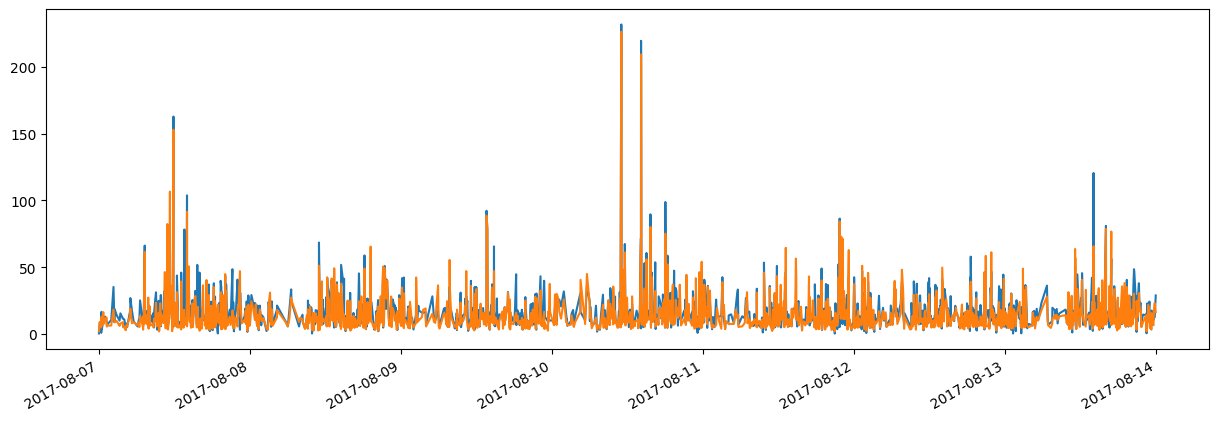

In [32]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(response_times_plot["time"], response_times_plot["response_time"])
plt.plot(response_times_plot["time"], df_simple_response_times_plot["response_time"])
plt.gcf().autofmt_xdate()
#plt.ylim(0, 100)

uses historic dispatch time. 